In [ ]:
from timeseries_fastai.imports import *
from timeseries_fastai.data import *
from timeseries_fastai.core import *
from timeseries_fastai.models import *

# Regression Example

In [ ]:
PATH = Path.cwd()

We can Load the supplied Adiac 

In [ ]:
df_train, df_test = load_df_ucr(PATH, 'Adiac')

Loading files from: /home/tcapelle/SteadySun/timeseries_fastai/Adiac


Bonjour

let's modify the data to make target col continous.

In [ ]:
df_train.target = df_train.target.astype(float)
df_test.target = df_test.target.astype(float)

In [ ]:
x_cols = df_train.columns[0:-1].to_list()

we have to pass a `y_block` of type `RegressionBlock`

In [ ]:
dls = TSDataLoaders.from_dfs(df_train, df_test, x_cols=x_cols, label_col='target', y_block=RegressionBlock, bs=16)

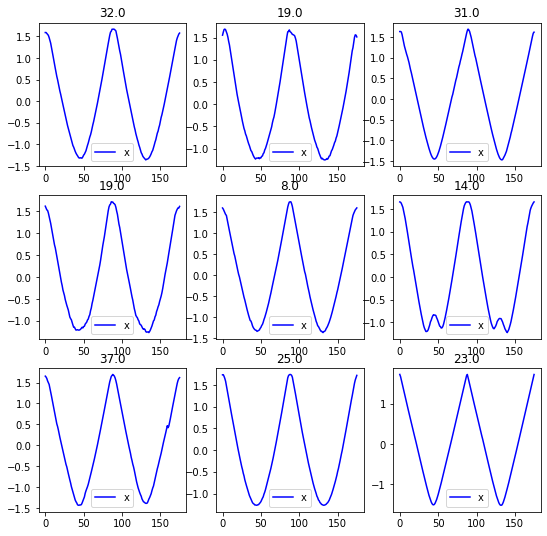

In [ ]:
dls.show_batch()

We can check, that the dls has a MSE loss now

In [ ]:
dls.loss_func

FlattenedLoss of MSELoss()

the output now is one continous variables

In [ ]:
resnet = create_resnet(1, 1)

In [ ]:
learn = Learner(dls, resnet, metrics=[mse])

In [ ]:
learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,mse,time
0,475.513428,529.668579,529.668579,00:02
1,467.713593,895.940308,895.940308,00:02
2,458.812927,554.190674,554.190674,00:02
3,443.028015,348.697540,348.697540,00:02
4,434.232330,417.968750,417.968750,00:02
